In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

from scipy.stats import skew

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Data exploration after cleaning and merging weather and trips files.

In [19]:
df = pd.read_csv(
    '/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/cleaned_merged_weather_trips.csv')


In [20]:
df.shape


(1890718, 28)

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890718 entries, 0 to 1890717
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   TRIPID               int64  
 1   LINEID               object 
 2   ROUTEID              object 
 3   DIRECTION            int64  
 4   PLANNEDTIME_ARR      float64
 5   PLANNEDTIME_DEP      float64
 6   HOUR                 int64  
 7   temp                 float64
 8   dew_point            float64
 9   feels_like           float64
 10  temp_min             float64
 11  temp_max             float64
 12  pressure             int64  
 13  humidity             int64  
 14  wind_speed           float64
 15  wind_deg             int64  
 16  rain_1h              float64
 17  snow_1h              float64
 18  clouds_all           int64  
 19  weather_id           int64  
 20  weather_main         object 
 21  weather_description  object 
 22  snow_ice             int64  
 23  heavy_precip         int64  
 24

In [22]:
df.duplicated().sum()

0

In [23]:
df.isnull().sum()

TRIPID                 0
LINEID                 0
ROUTEID                0
DIRECTION              0
PLANNEDTIME_ARR        0
PLANNEDTIME_DEP        0
HOUR                   0
temp                   0
dew_point              0
feels_like             0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
snow_1h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
snow_ice               0
heavy_precip           0
TRIPTIME               0
WEEKDAY                0
MONTH                  0
RUSHHOUR               0
dtype: int64

## 1.2 On the training set we will now carry out a series of plots comparing all features to help make decisions on what features to keep for the model 

- All plots will be using the training subset of dataset: X_train, y_train

### 1.2.1 Plot the correlations between all the continuous features. 

In [24]:
#split by direction first
df_dir_1 = df[df['DIRECTION']==1]
df_dir_2 = df[df['DIRECTION']==2]
directions_df_list = [df_dir_1, df_dir_2]

Direction 1
The skew of this distribution is =  0.2941532120084585


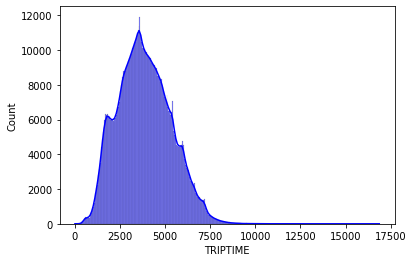

Direction 2
The skew of this distribution is =  0.2459653859203064


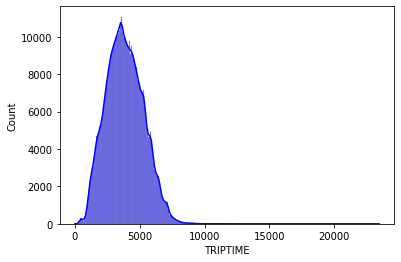

In [25]:
i=0
for direction in directions_df_list:
    i+=1
    print("Direction", str(i))
    # Analyse the histogram
    print('The skew of this distribution is = ', skew(direction['TRIPTIME']))
    sns.histplot(direction['TRIPTIME'], kde = True, color = 'blue')
    plt.show()


The skew value above indicates that the data is positively skewed or skewed right. I will now check for outliers, first by creating a boxplot of the data.

#### Direction 1

In [26]:
dir_1_lines = list(df_dir_1['LINEID'].unique())

Line 68


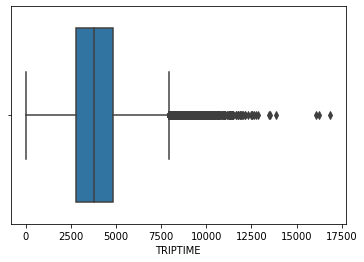

Line 59


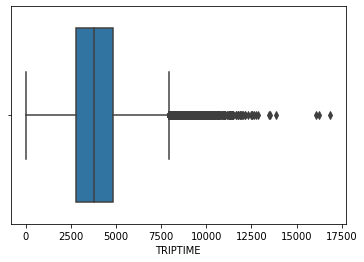

Line 26


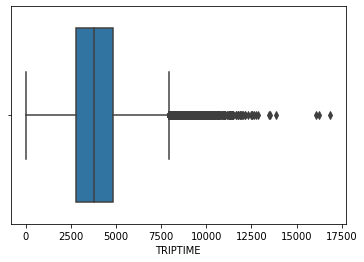

Line 1


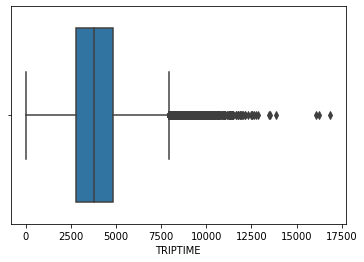

Line 84


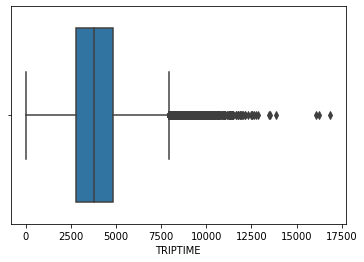

Line 11


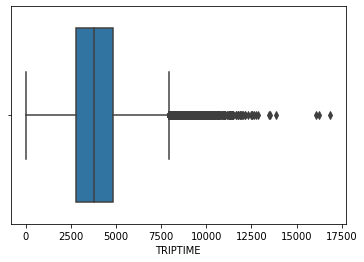

Line 75


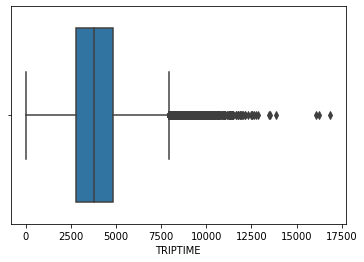

Line 42


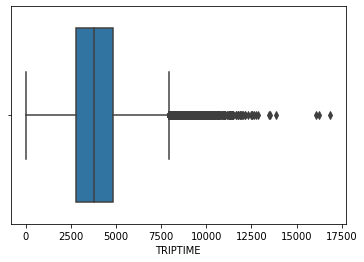

Line 123


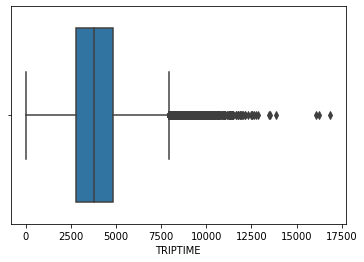

Line 25


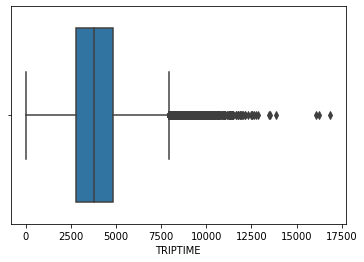

Line 65B


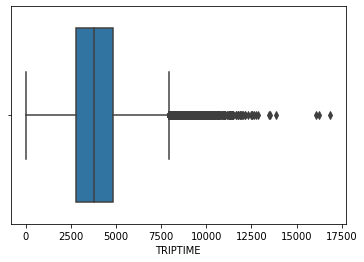

Line 83


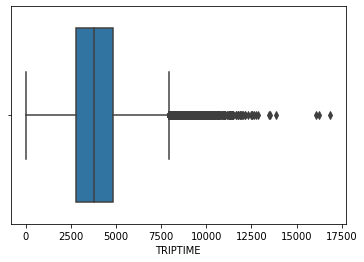

Line 31


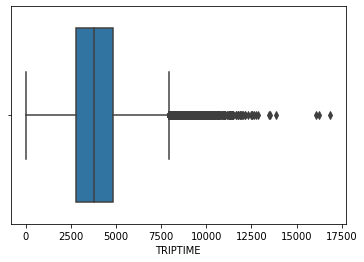

Line 54A


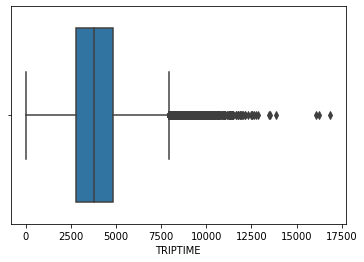

Line 66B


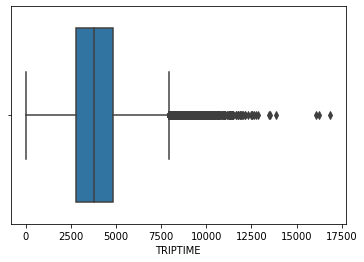

Line 15


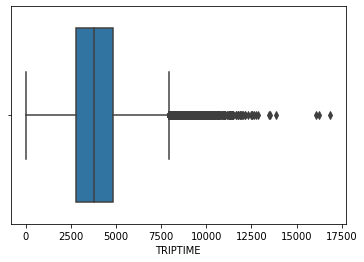

Line 15B


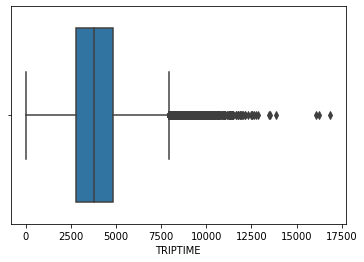

Line 66


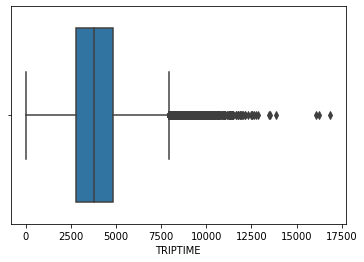

Line 27


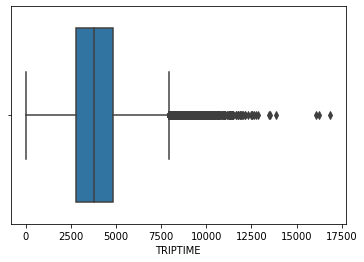

Line 17A


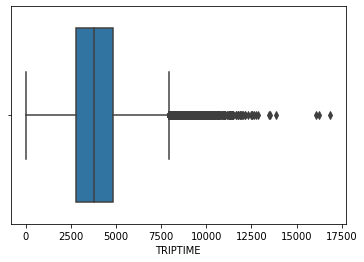

Line 41B


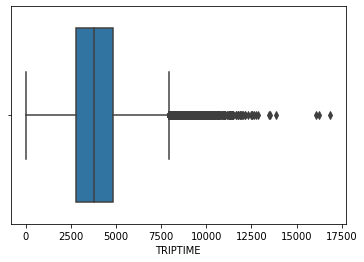

Line 184


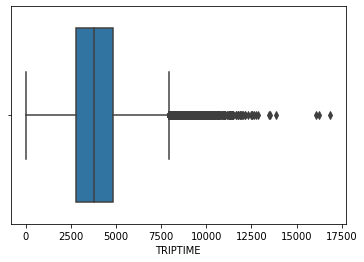

Line 9


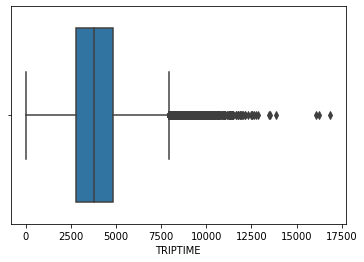

Line 65


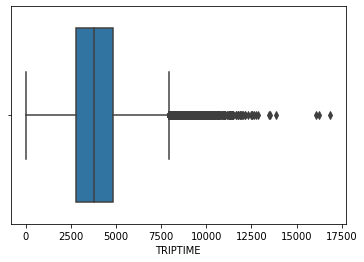

Line 39A


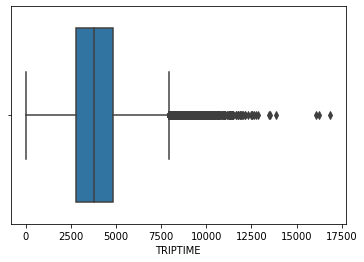

Line 56A


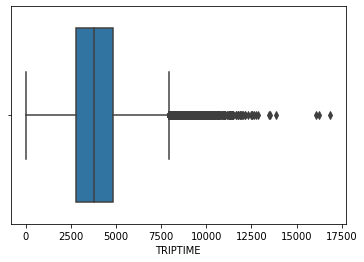

Line 151


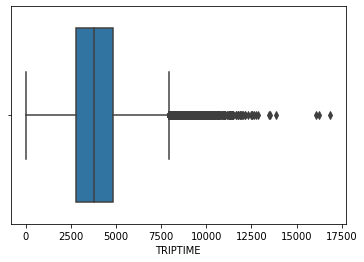

Line 270


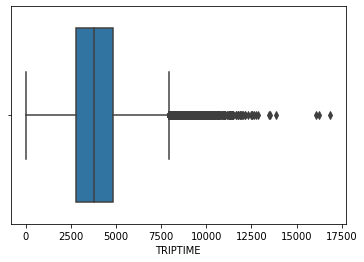

Line 122


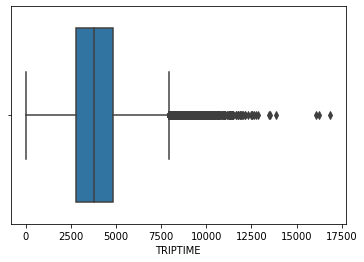

Line 33


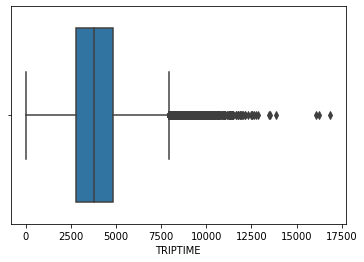

Line 79


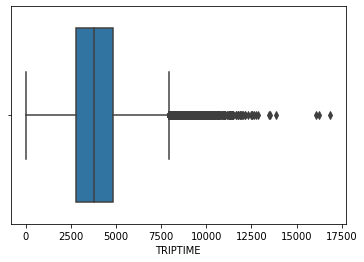

Line 27A


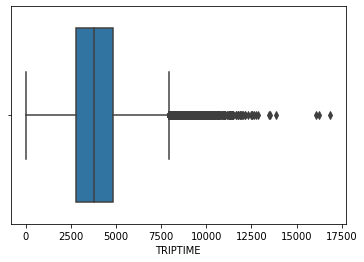

Line 46A


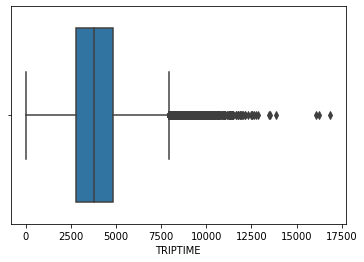

Line 33B


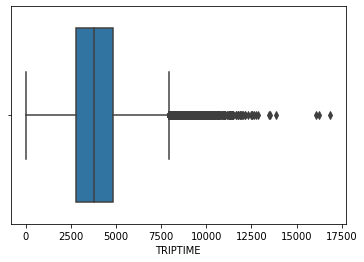

Line 45A


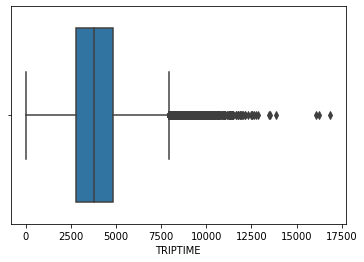

Line 25A


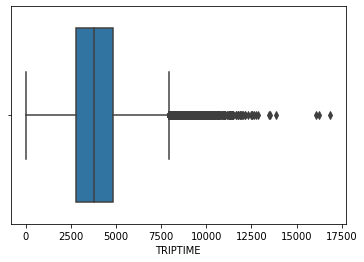

Line 40


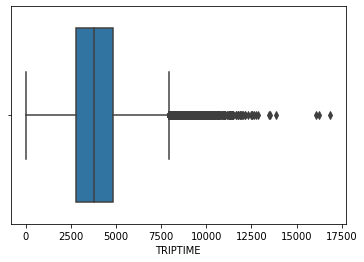

Line 44


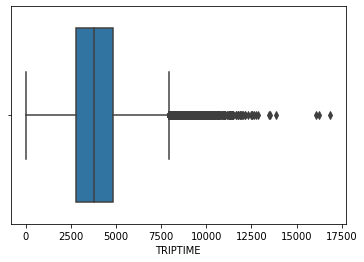

Line 32


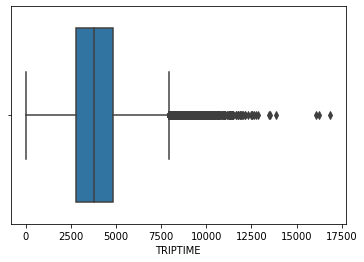

Line 150


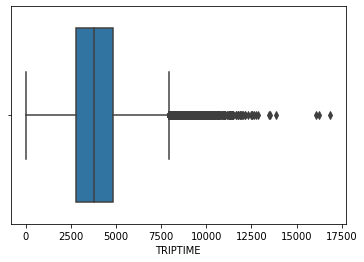

Line 185


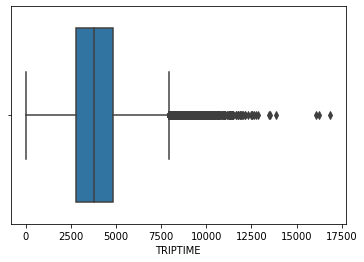

Line 130


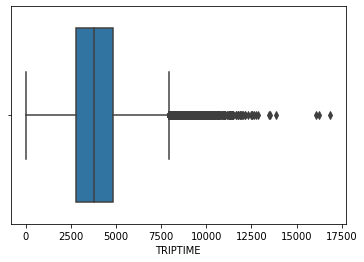

Line 47


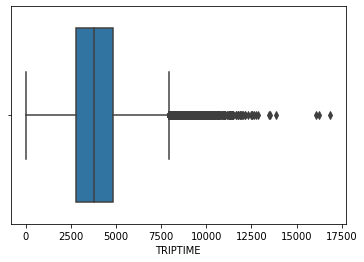

Line 40D


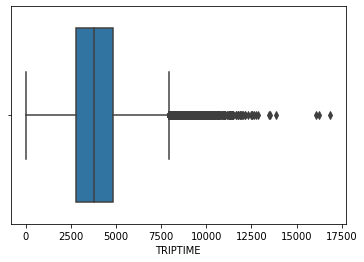

Line 69


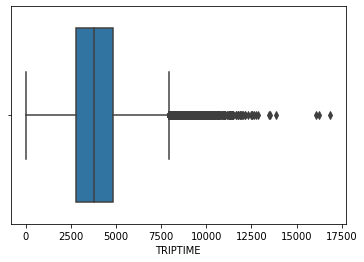

Line 67


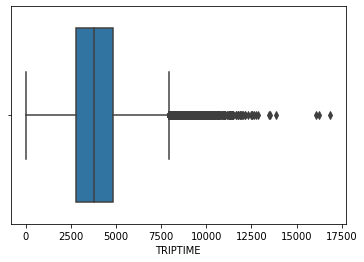

Line 70


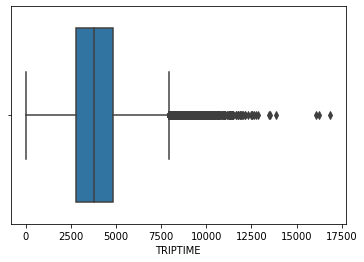

Line 16C


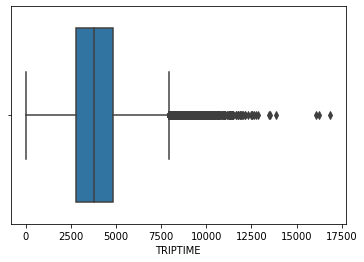

Line 37


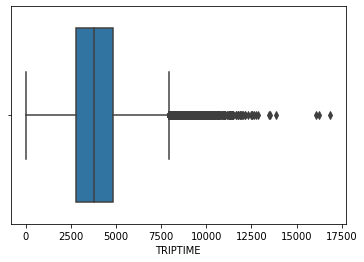

Line 41C


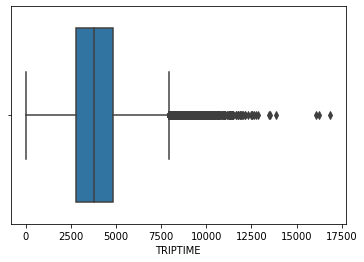

Line 40B


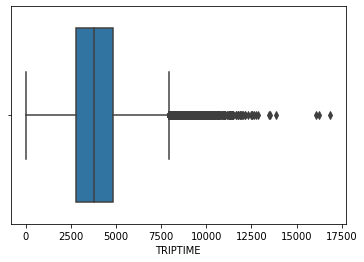

Line 4


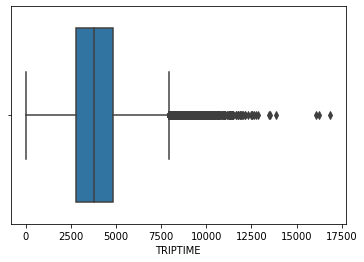

Line 120


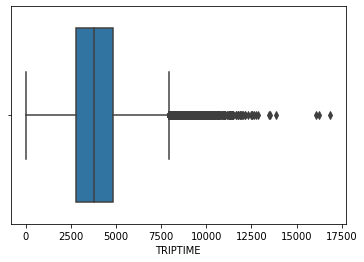

Line 66A


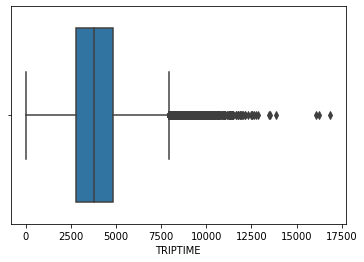

Line 14


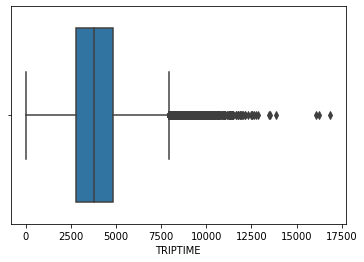

Line 15A


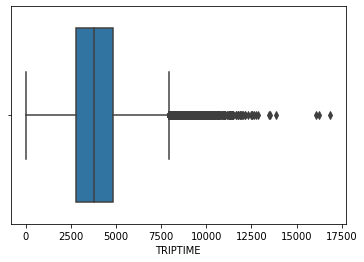

Line 111


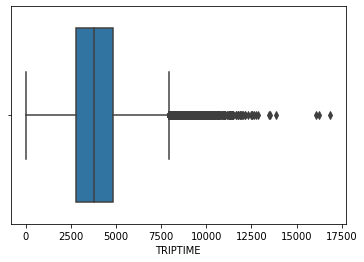

Line 145


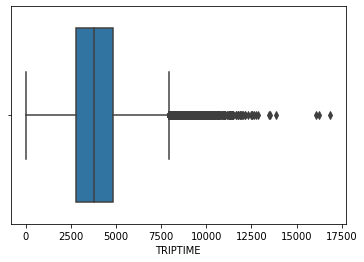

Line 53


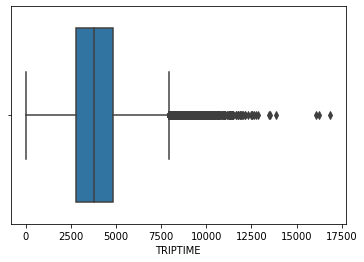

Line 41


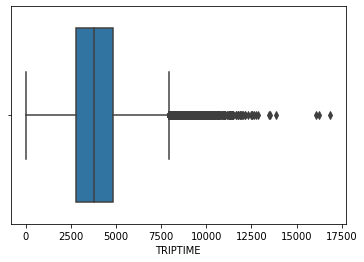

Line 239


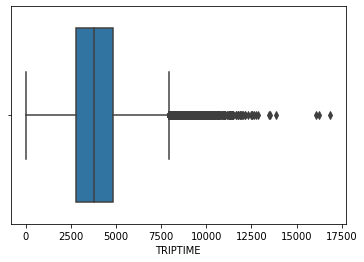

Line 102


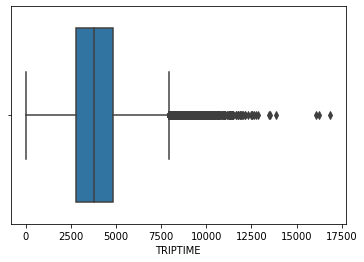

Line 68A


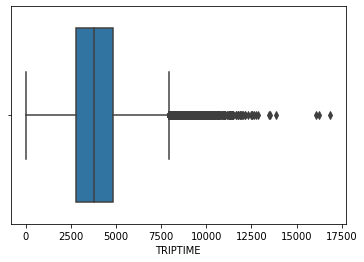

Line 31A


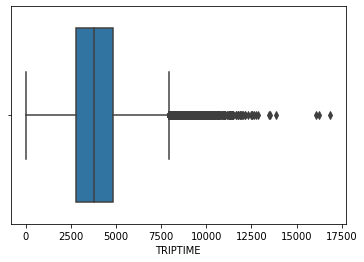

Line 114


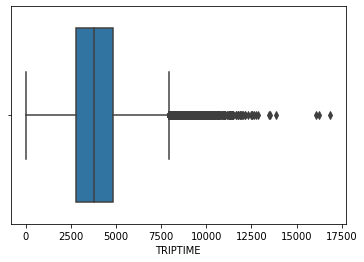

Line 16


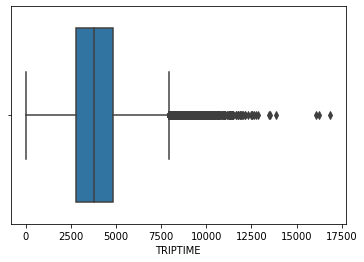

Line 140


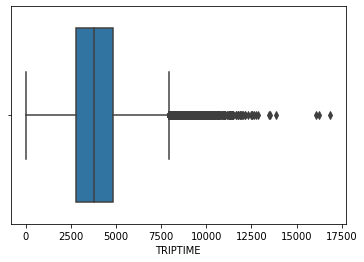

Line 7


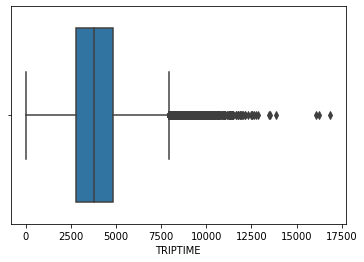

Line 84A


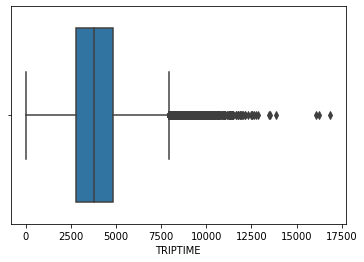

Line 13


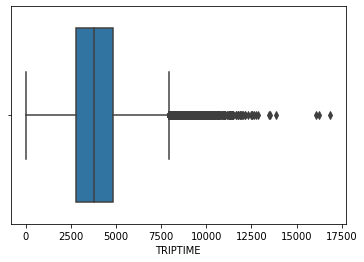

Line 77A


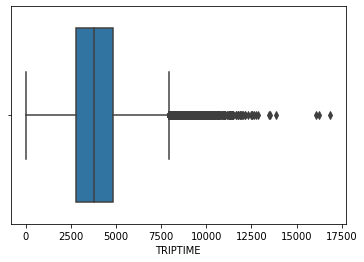

Line 220


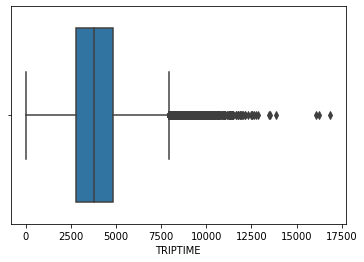

Line 63


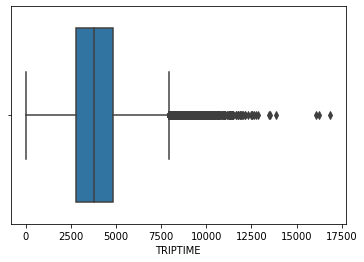

Line 236


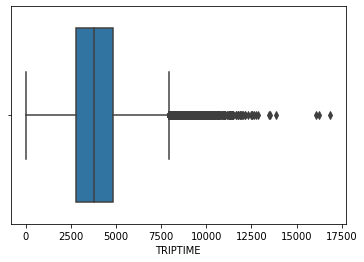

Line 38


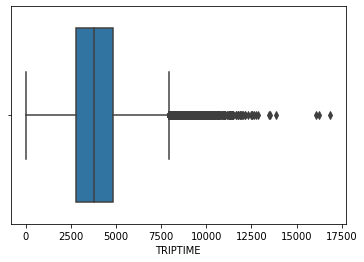

Line 27B


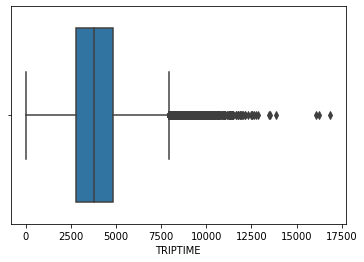

Line 39


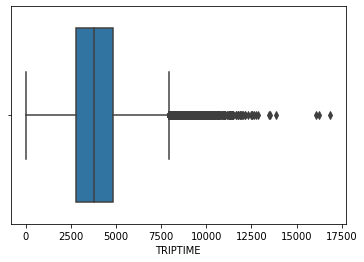

Line 43


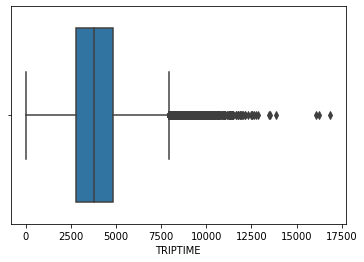

Line 17


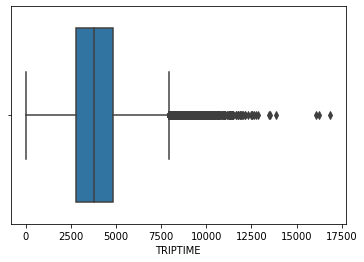

Line 49


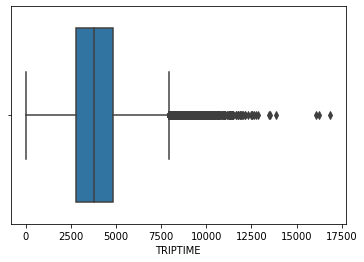

Line 79A


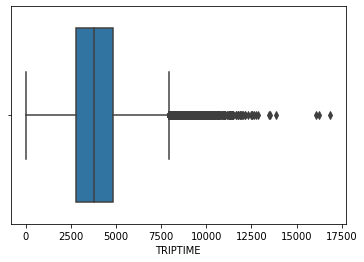

Line 38A


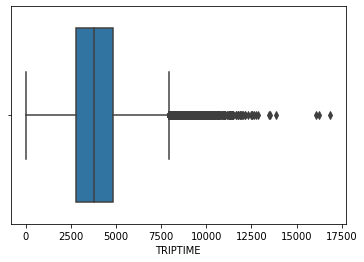

Line 44B


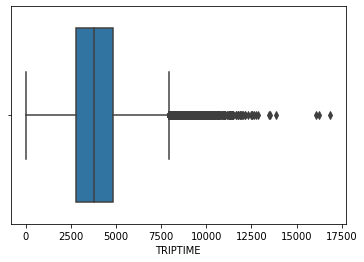

Line 29A


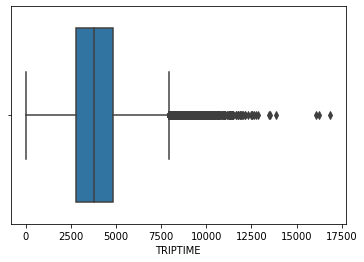

Line 76


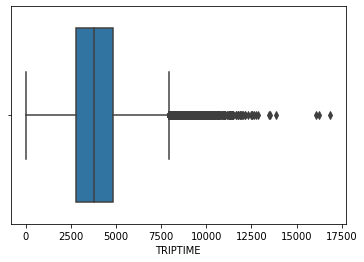

Line 25B


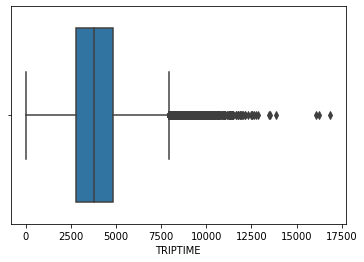

Line 7A


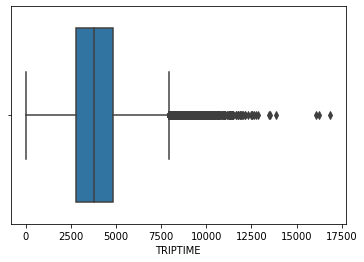

Line 116


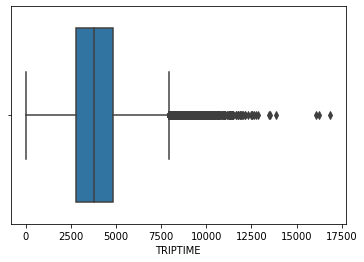

Line 61


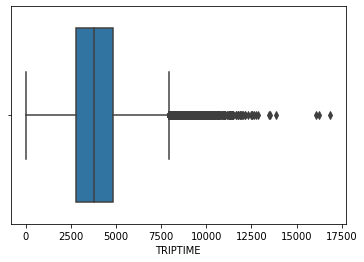

Line 238


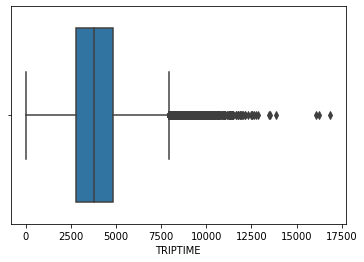

Line 18


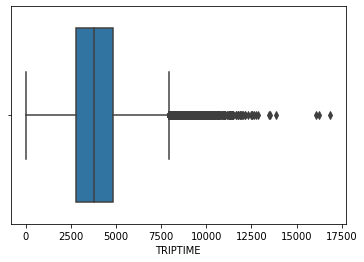

Line 33A


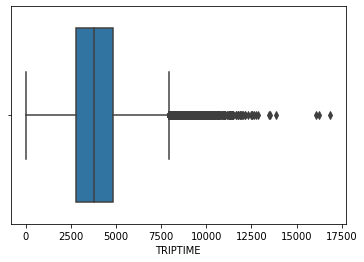

Line 104


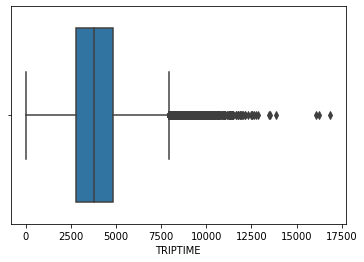

Line 142


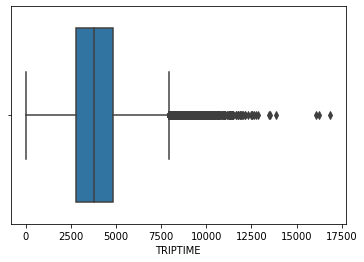

Line 83A


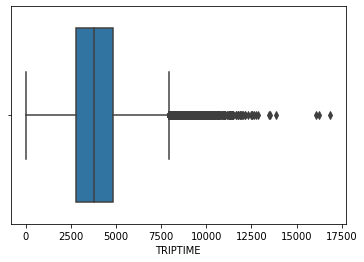

Line 33X


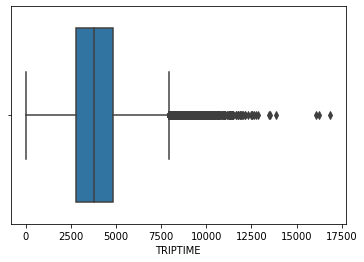

Line 67X


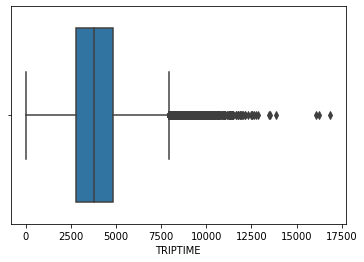

Line 15D


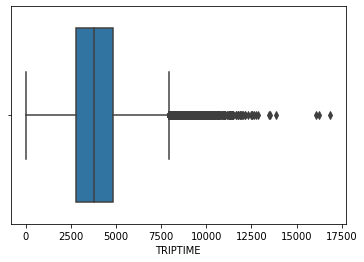

Line 39X


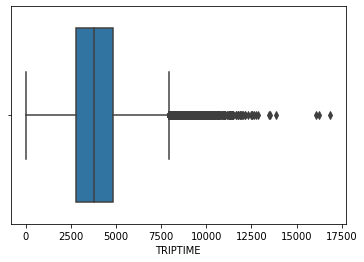

Line 84X


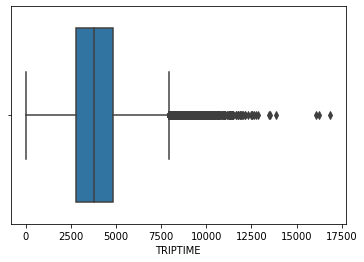

Line 66X


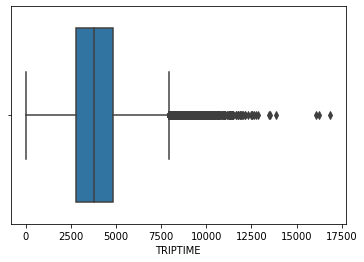

Line 41X


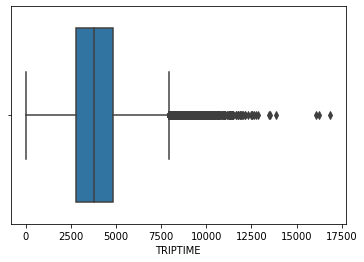

Line 25X


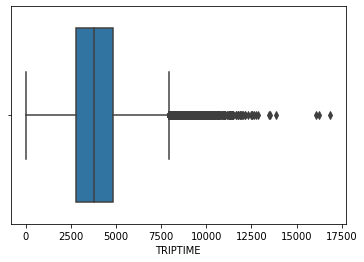

Line 31B


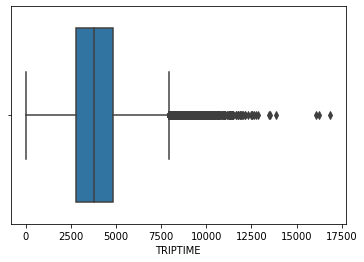

Line 38B


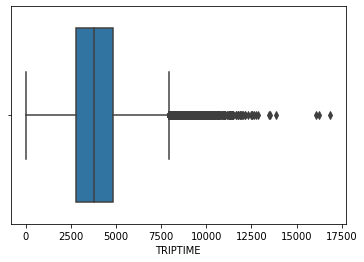

Line 27X


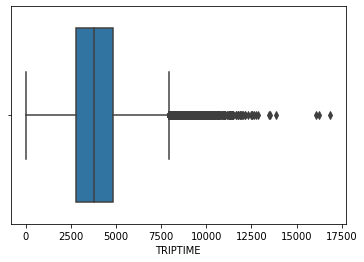

Line 31D


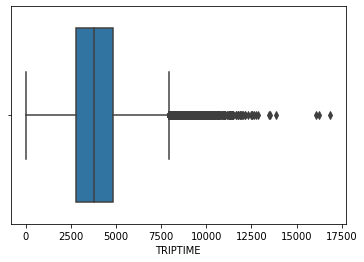

Line 7B


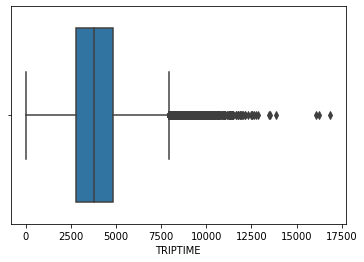

Line 51D


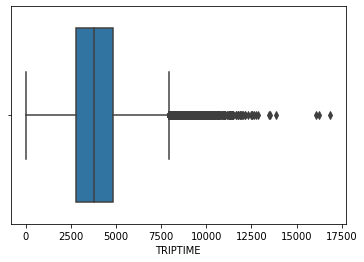

Line 42D


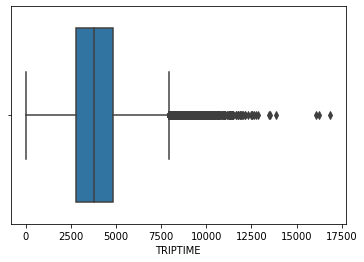

Line 70D


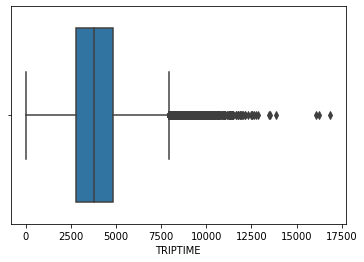

Line 7D


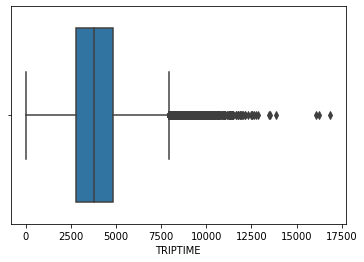

Line 25D


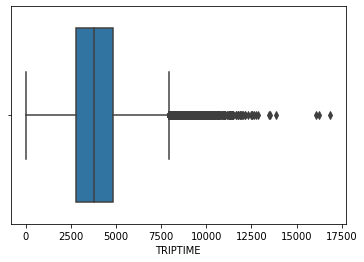

Line 33D


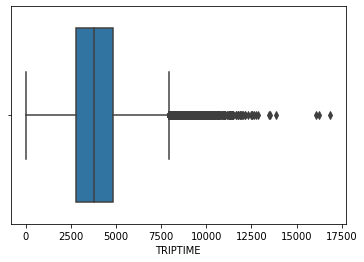

Line 69X


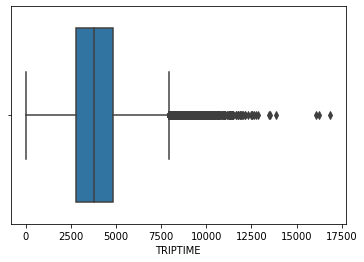

Line 76A


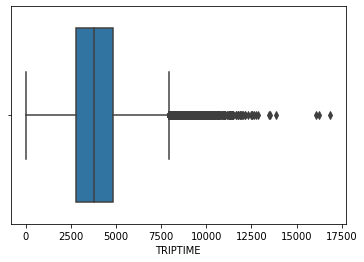

Line 32X


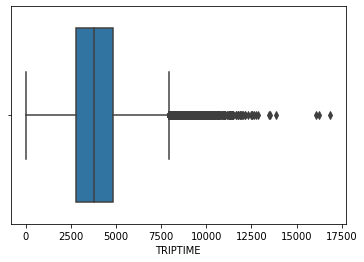

Line 38D


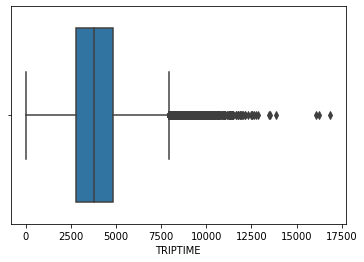

Line 14C


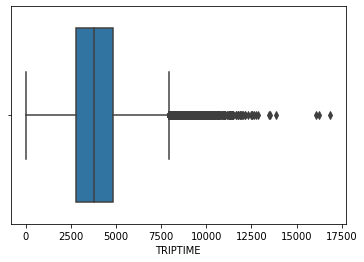

Line 40E


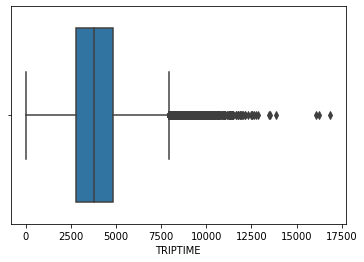

Line 161


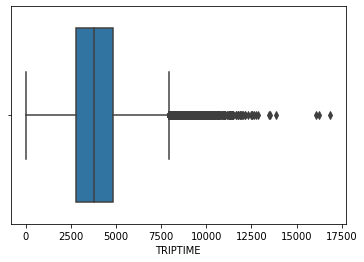

Line 16D


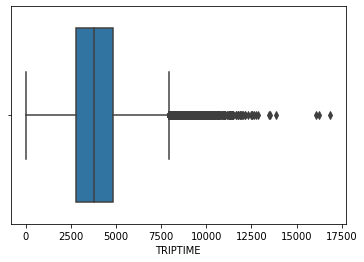

Line 33E


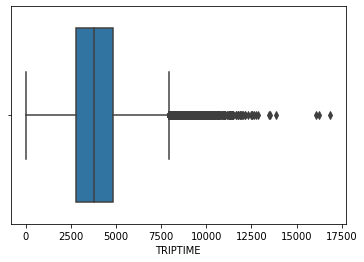

Line 41D


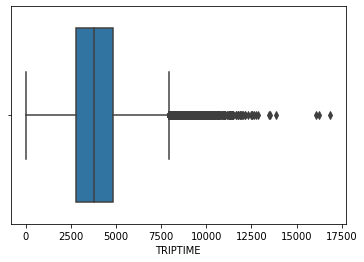

In [27]:
for line in dir_1_lines:
    # Analyse the histogram
    print("Line", str(line))
    sns.boxplot(x=df_dir_1['TRIPTIME'])
    plt.show()

We can see from the above boxplot that there are some outliers lying between 12500 and 17500 seconds.

Code from https://stackoverflow.com/questions/68959573/how-do-i-delete-rows-in-a-dataframe-based-on-numpy-where

In [28]:
for line in dir_1_lines:
    # print number of rows in dataframe
    print("Number of rows remaining in dataframe:", str(df_dir_1.shape[0]))

    df_dir_1.reset_index(drop=True, inplace=True)
    print("Now doing line", str(line))

    # select all rows with the current line id 
    df_selected_line = df_dir_1.loc[df_dir_1['LINEID']==line]
    
    # get zscores
    line_zscores = np.abs(stats.zscore(df_selected_line['TRIPTIME']))
    
    # get rows above and below threshold
    rows_above_threshold = np.where(line_zscores > 3)
    rows_below_threshold = np.where(line_zscores < -3)
    # print number of rows
    print("There are", str(len(rows_above_threshold[0])), "row(s) above the threshold, and", str(len(rows_below_threshold[0])), "row(s) below \
         the threshold. ", str(len(rows_above_threshold[0])+len(rows_below_threshold[0])), "row(s) will be dropped from the dataframe")
    
    # convert to numpy array
    rows_above_threshold = np.asarray(rows_above_threshold)
    rows_below_threshold = np.asarray(rows_below_threshold)

    # drop rows outside of threshold
    df_dir_1 = df_dir_1.drop(rows_above_threshold.flatten(), axis=0)
    df_dir_1 = df_dir_1.drop(rows_below_threshold.flatten(), axis=0)

Number of rows remaining in dataframe: 947448
Now doing line 68
There are 29 row(s) above the threshold, and 0 row(s) below          the threshold.  29 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 947419
Now doing line 59
There are 9 row(s) above the threshold, and 0 row(s) below          the threshold.  9 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 947410
Now doing line 26
There are 82 row(s) above the threshold, and 0 row(s) below          the threshold.  82 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 947328
Now doing line 1
There are 16 row(s) above the threshold, and 0 row(s) below          the threshold.  16 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 947312
Now doing line 84
There are 78 row(s) above the threshold, and 0 row(s) below          the threshold.  78 row(s) will be dropped from the dataframe
Number of rows remaining in dataf

After removing the outliers, I will view the distribution again.

The skew of this distribution is =  0.2944501617626101


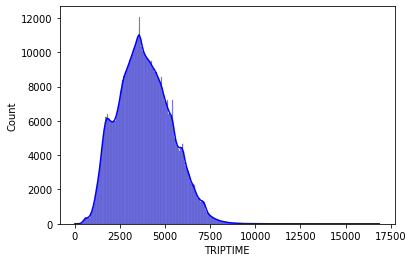

In [35]:
print('The skew of this distribution is = ', skew(df_dir_1['TRIPTIME']))
sns.histplot(df_dir_1['TRIPTIME'], kde = True, color = 'blue')
plt.show()

I will now reindex the rows

In [29]:
df_dir_1.reset_index(drop=True, inplace=True)

Save to csv

In [30]:
df_dir_1.to_csv('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/data_exploration_dir_1_cleaned.csv', index=False)

### Direction 2 

In [31]:
dir_2_lines = list(df_dir_2['LINEID'].unique())

Line 130


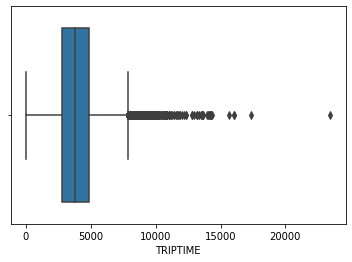

Line 1


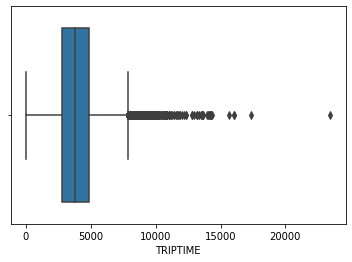

Line 45A


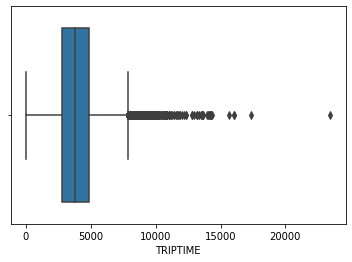

Line 70


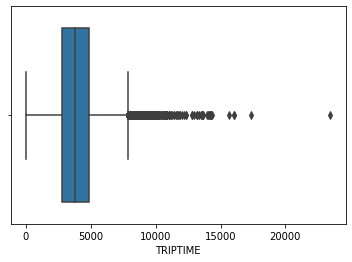

Line 40D


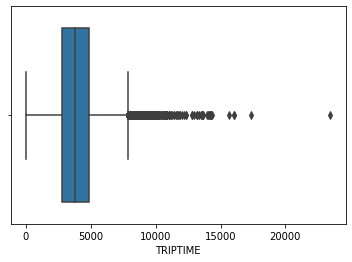

Line 145


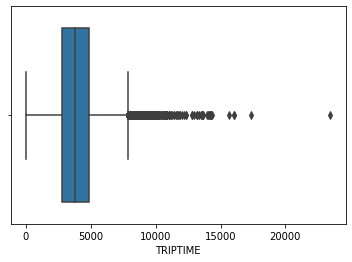

Line 39


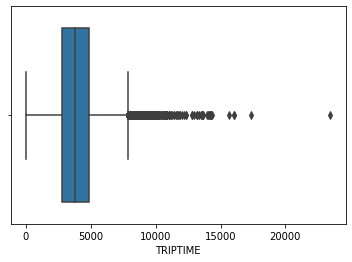

Line 140


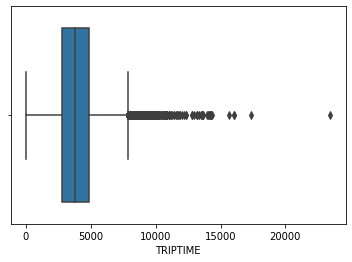

Line 41


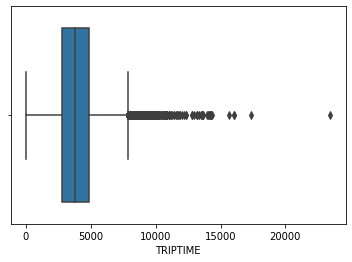

Line 15


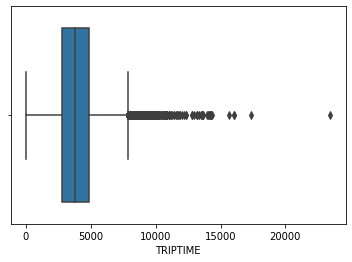

Line 44


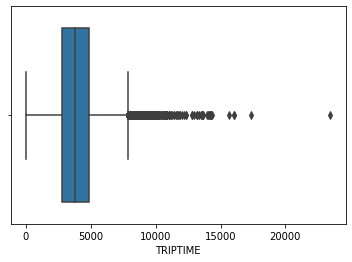

Line 39A


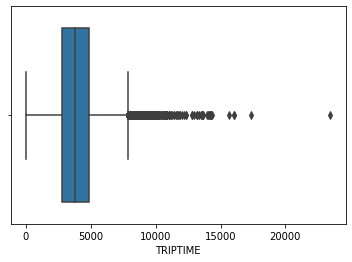

Line 77A


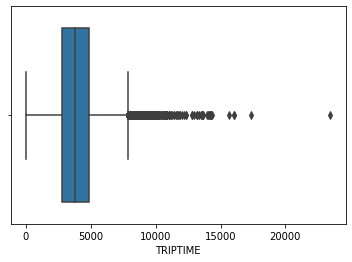

Line 122


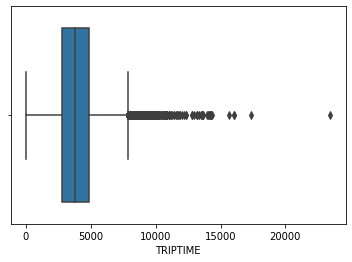

Line 27


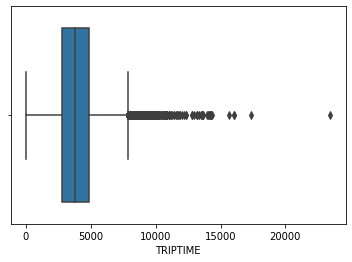

Line 102


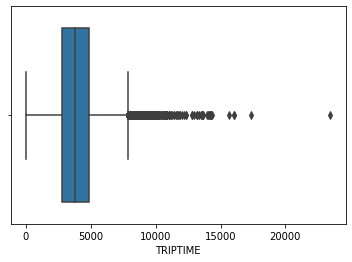

Line 65


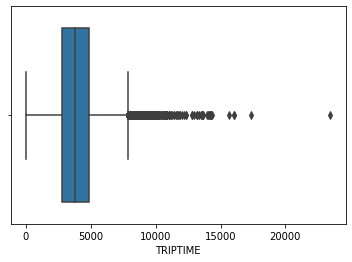

Line 150


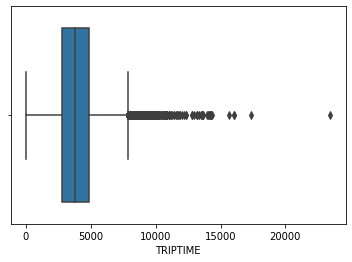

Line 9


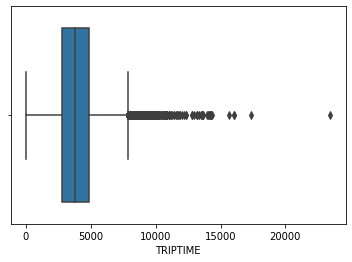

Line 17


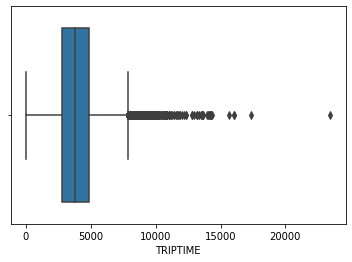

Line 54A


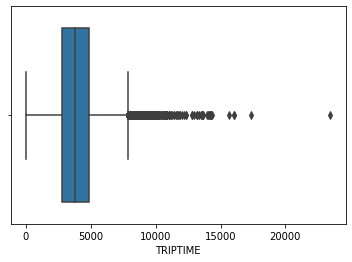

Line 29A


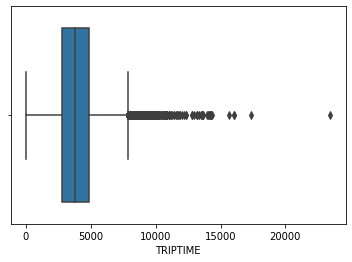

Line 40


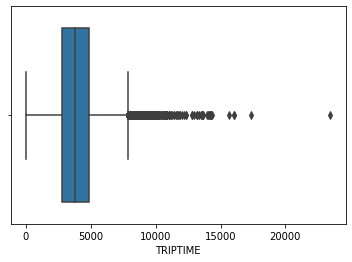

Line 17A


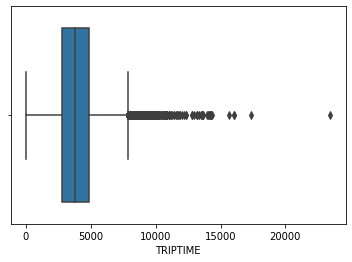

Line 123


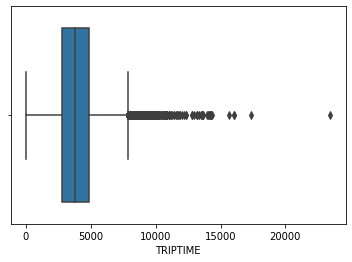

Line 33A


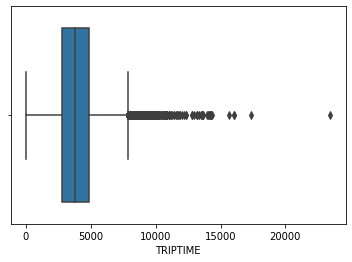

Line 15B


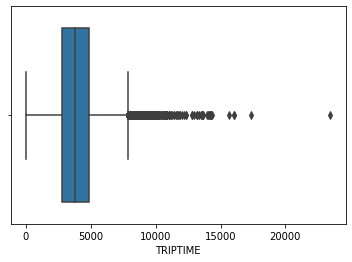

Line 68


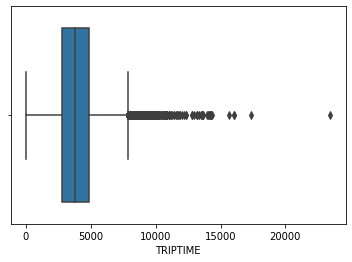

Line 15A


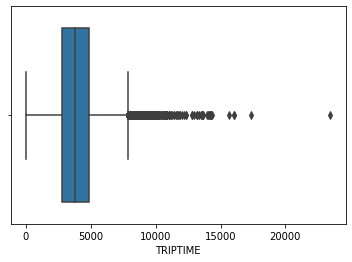

Line 4


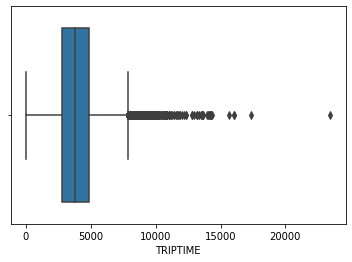

Line 7A


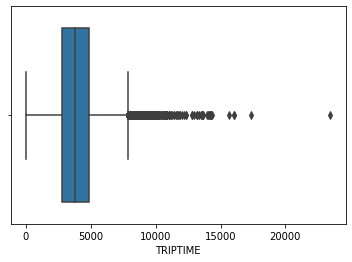

Line 42


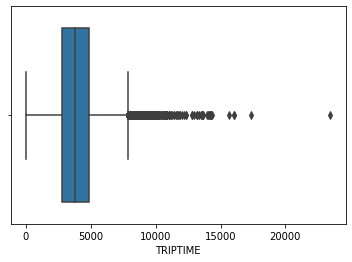

Line 16C


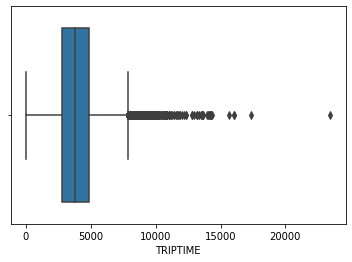

Line 38A


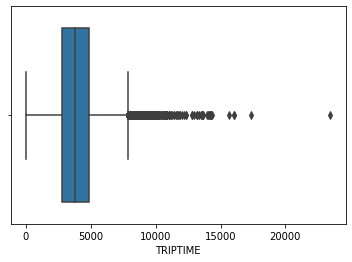

Line 65B


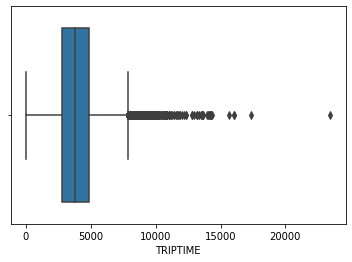

Line 185


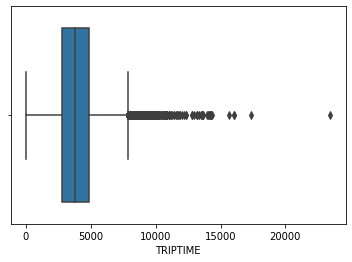

Line 61


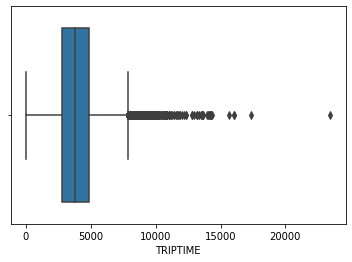

Line 27B


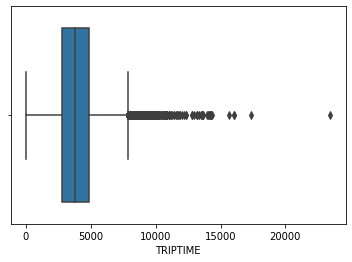

Line 56A


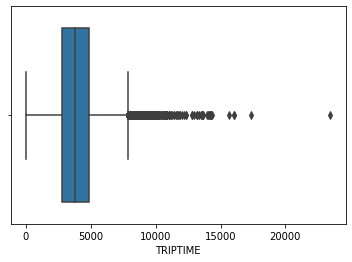

Line 38


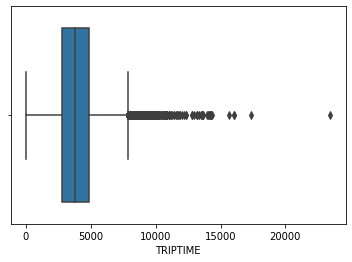

Line 46A


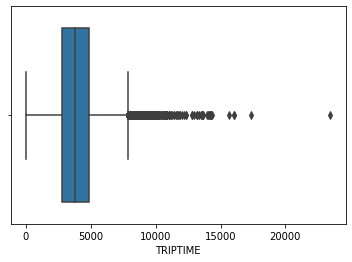

Line 7


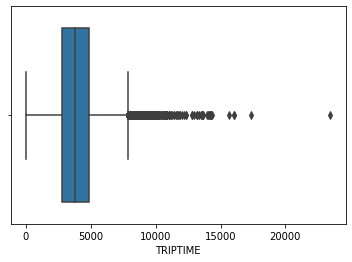

Line 84


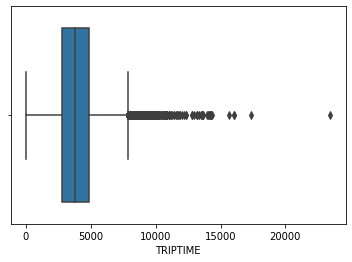

Line 32


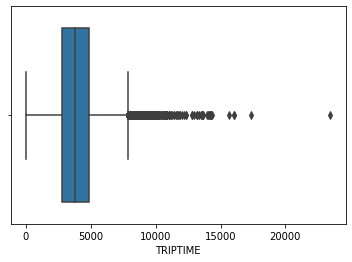

Line 75


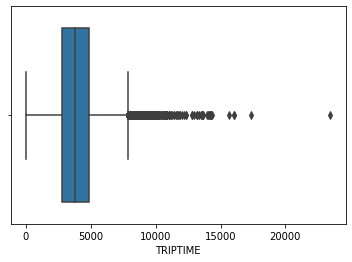

Line 41C


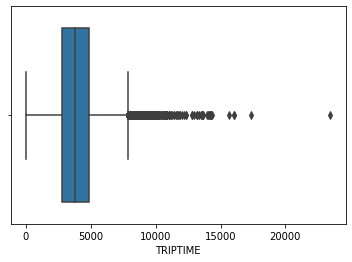

Line 120


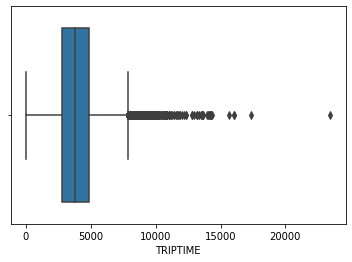

Line 111


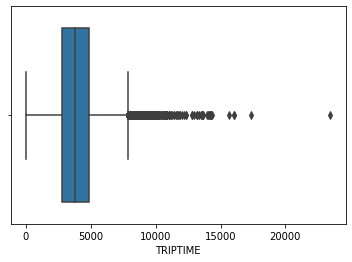

Line 151


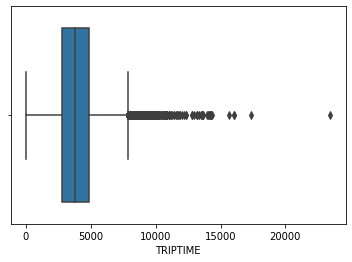

Line 27A


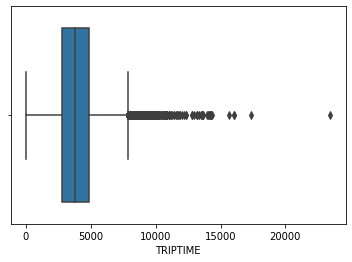

Line 31


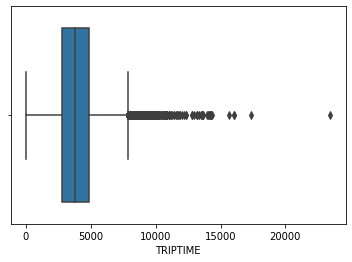

Line 76


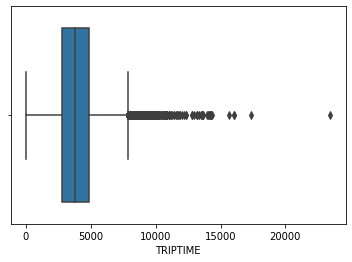

Line 79A


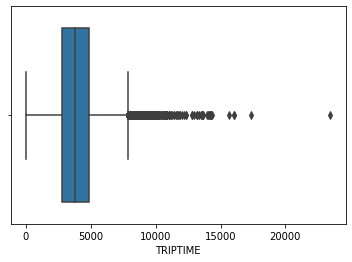

Line 25B


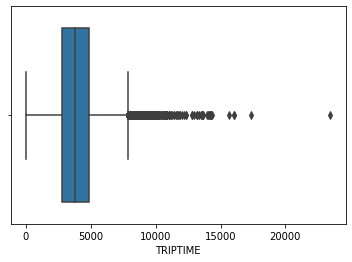

Line 27X


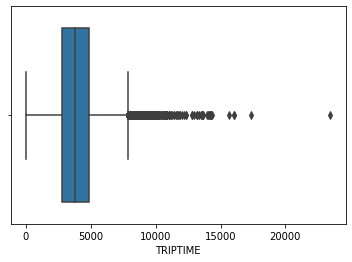

Line 66X


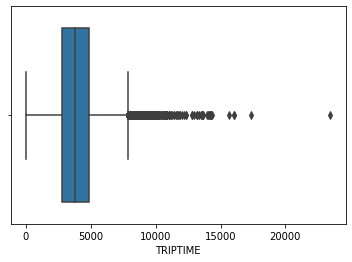

Line 16


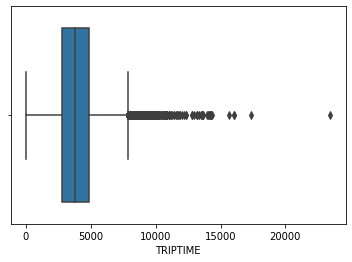

Line 37


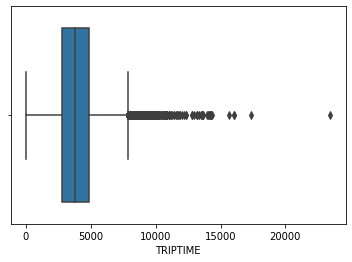

Line 33B


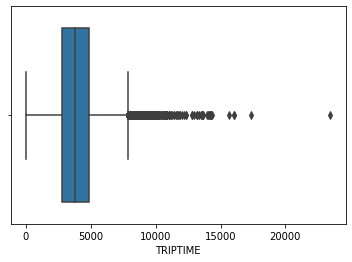

Line 51D


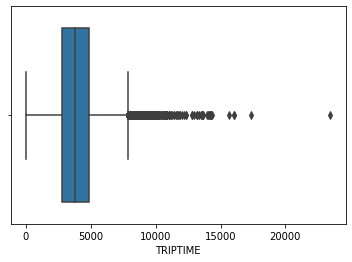

Line 79


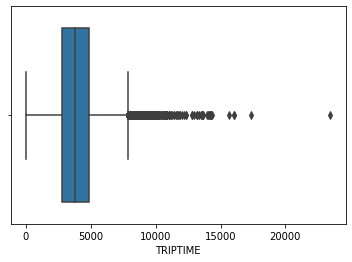

Line 83


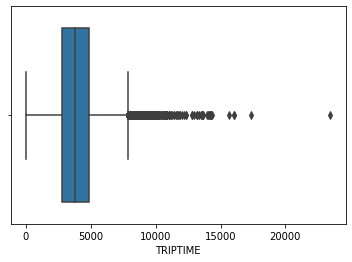

Line 38B


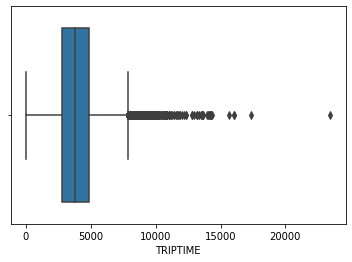

Line 25A


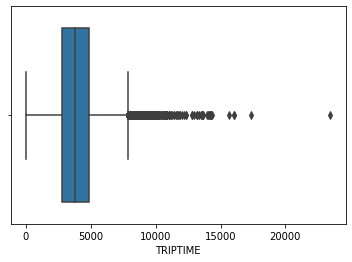

Line 26


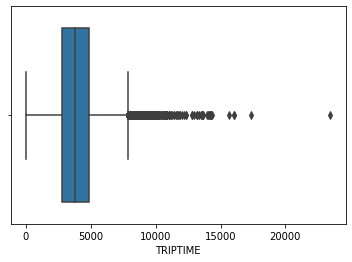

Line 66


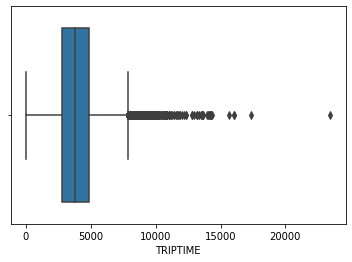

Line 13


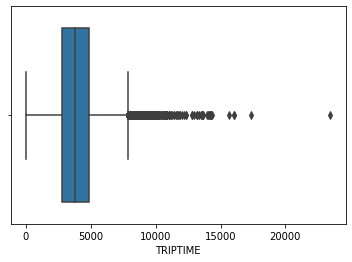

Line 49


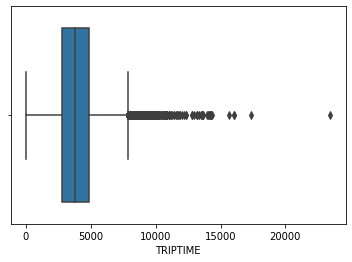

Line 47


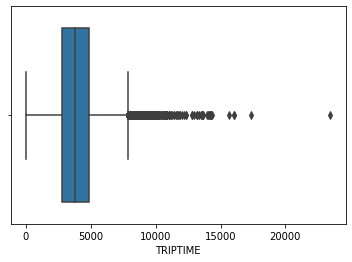

Line 11


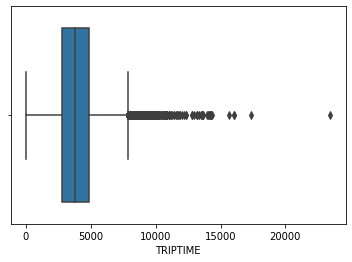

Line 67


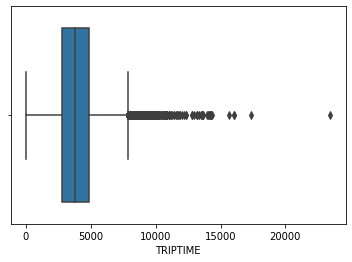

Line 63


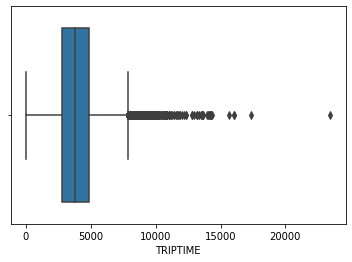

Line 184


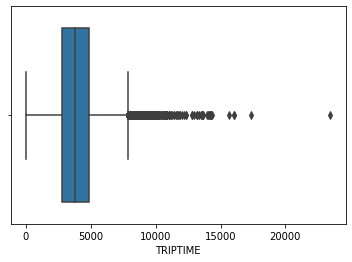

Line 14


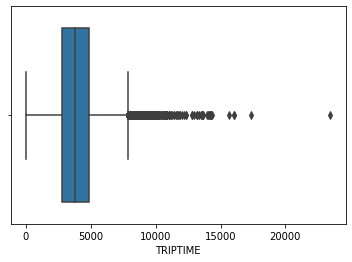

Line 66B


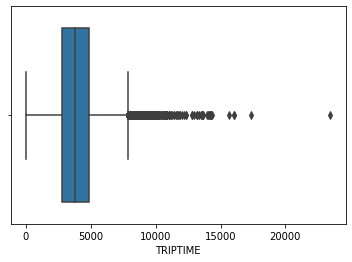

Line 44B


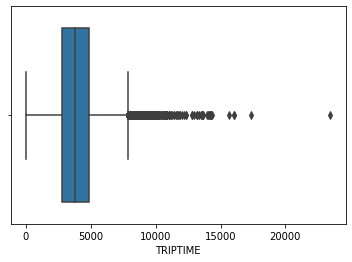

Line 43


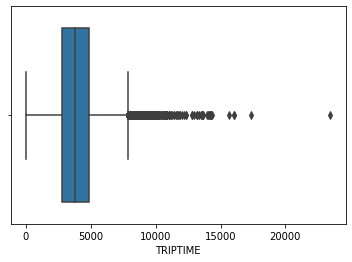

Line 7B


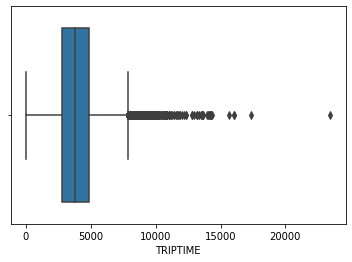

Line 18


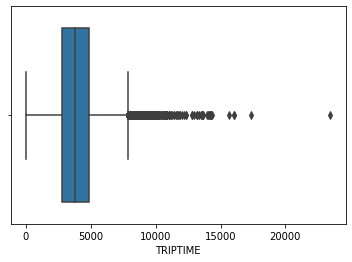

Line 270


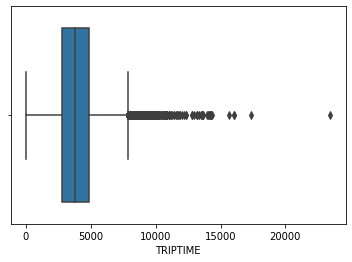

Line 220


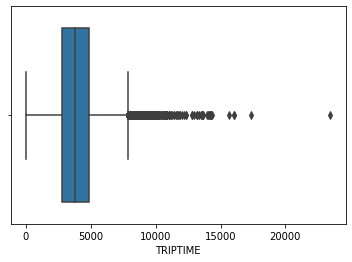

Line 59


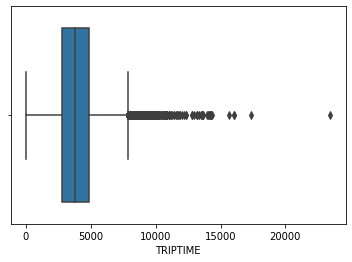

Line 15D


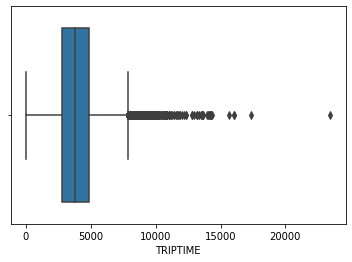

Line 238


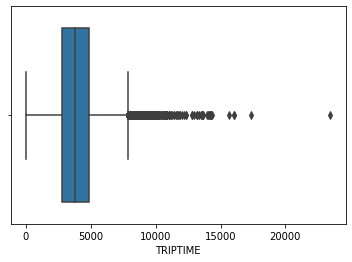

Line 104


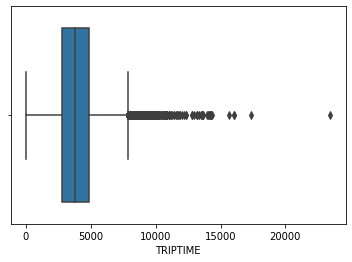

Line 239


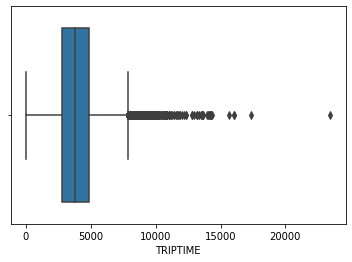

Line 66A


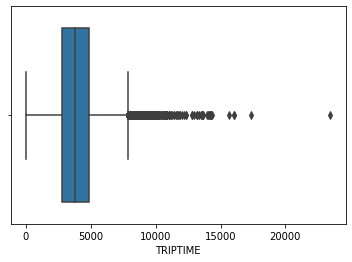

Line 40B


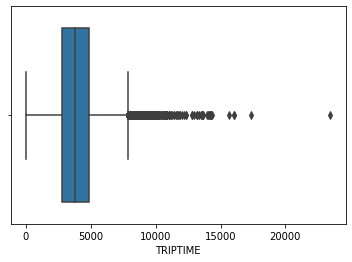

Line 53


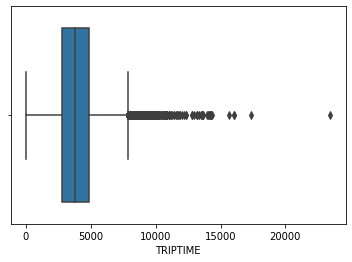

Line 69


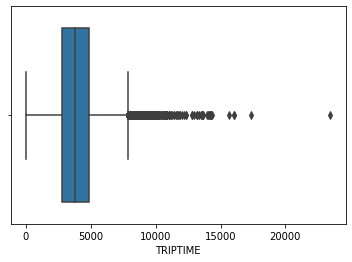

Line 25


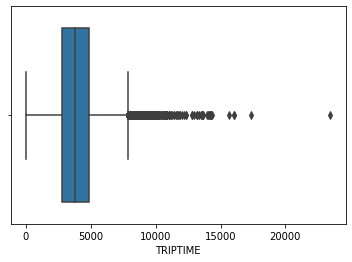

Line 114


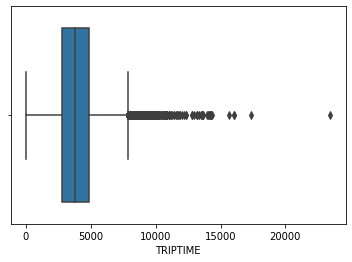

Line 76A


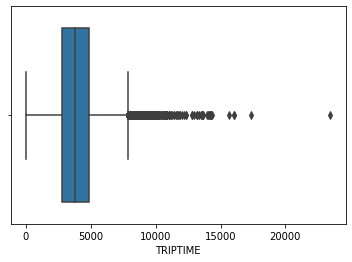

Line 84A


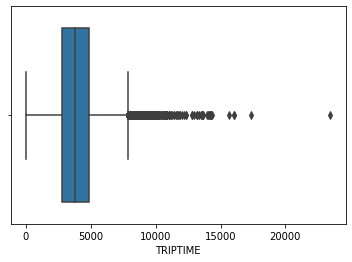

Line 142


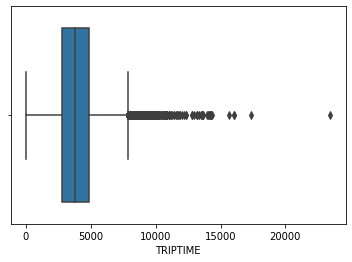

Line 83A


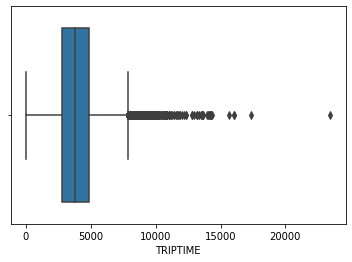

Line 33


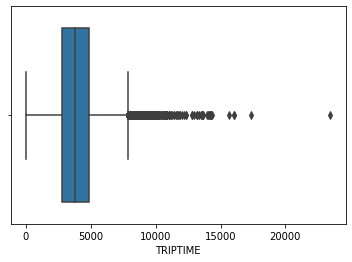

Line 14C


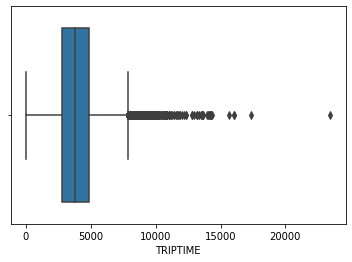

Line 84X


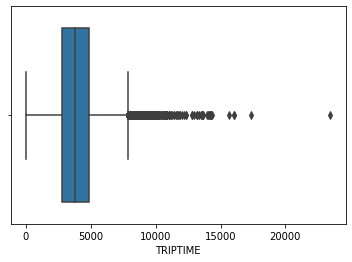

Line 31A


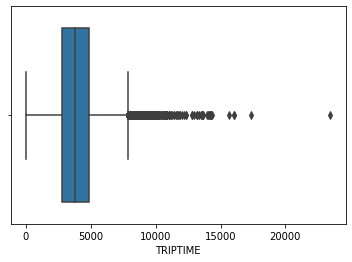

Line 236


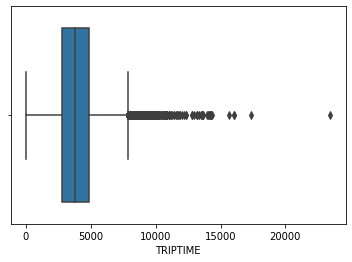

Line 32X


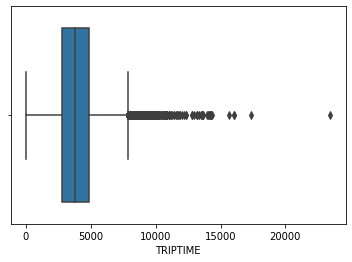

Line 68A


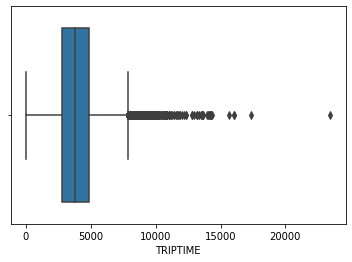

Line 31B


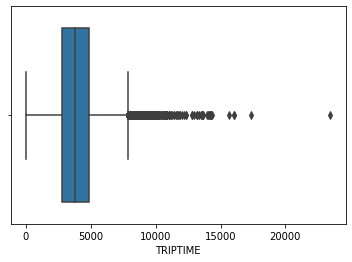

Line 41B


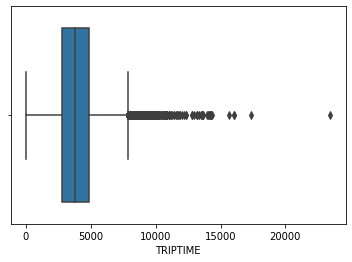

Line 67X


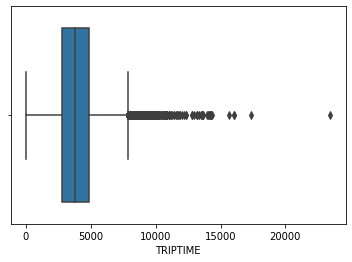

Line 33X


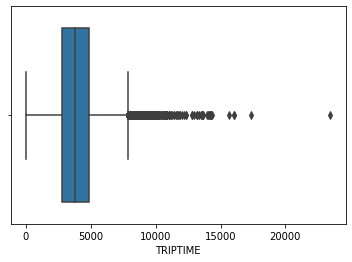

Line 41A


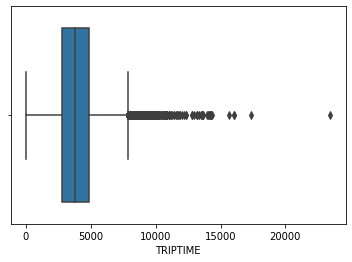

Line 7D


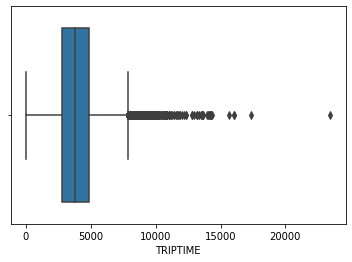

Line 39X


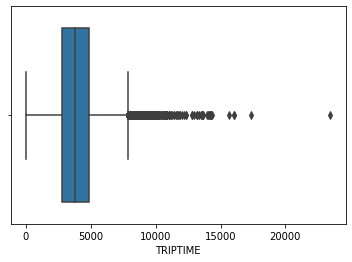

Line 41X


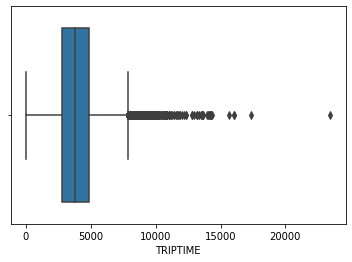

Line 69X


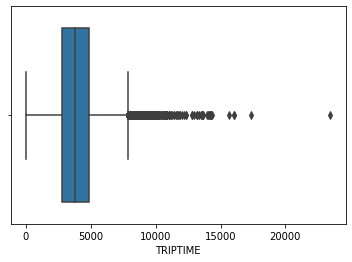

Line 31D


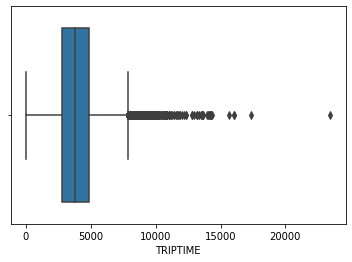

Line 70D


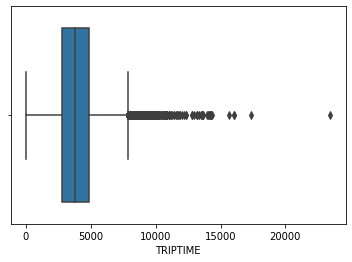

Line 42D


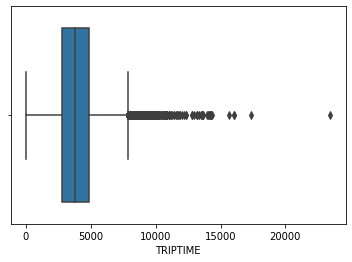

Line 51X


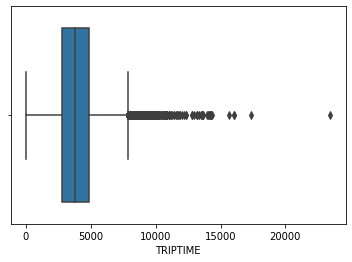

Line 25D


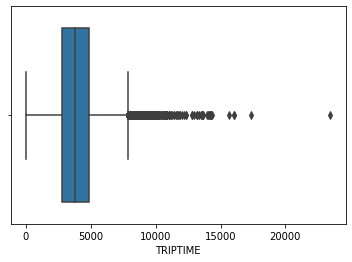

Line 116


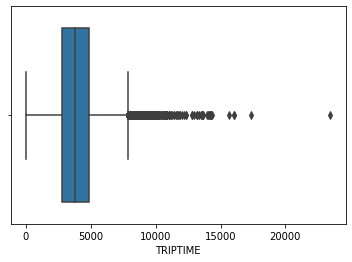

Line 46E


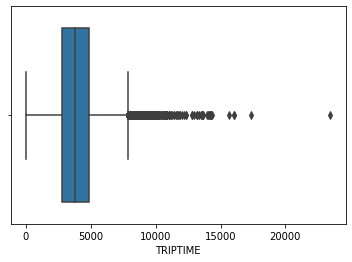

Line 77X


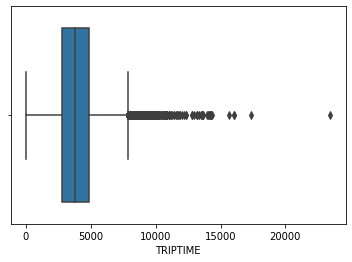

Line 161


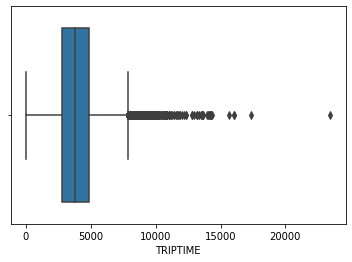

Line 25X


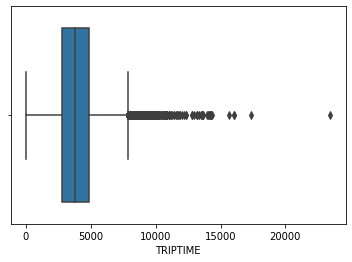

Line 38D


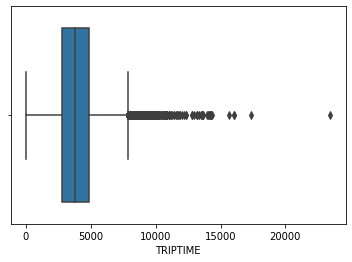

Line 118


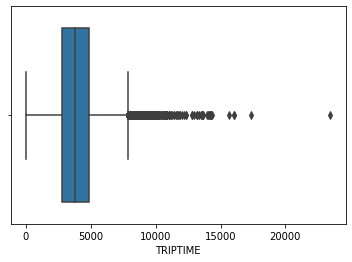

Line 33D


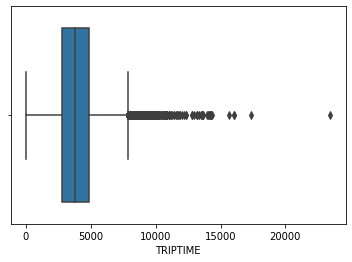

Line 68X


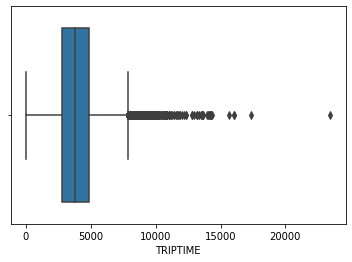

Line 40E


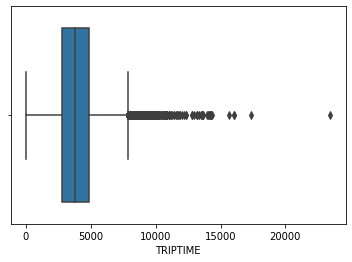

Line 41D


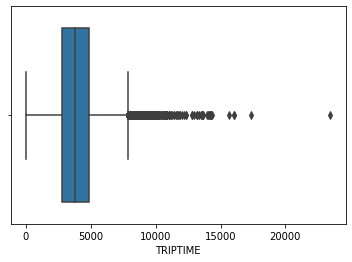

In [32]:
for line in dir_2_lines:
    # Analyse the histogram
    print("Line", str(line))
    sns.boxplot(x=df_dir_2['TRIPTIME'])
    plt.show()

In [33]:
for line in dir_2_lines:
    # print number of rows in dataframe
    print("Number of rows remaining in dataframe:", str(df_dir_2.shape[0]))

    df_dir_2.reset_index(drop=True, inplace=True)
    print("Now doing line", str(line))

    # select all rows with the current line id 
    df_selected_line = df_dir_2.loc[df_dir_2['LINEID']==line]
    
    # get zscores
    line_zscores = np.abs(stats.zscore(df_selected_line['TRIPTIME']))
    
    # get rows above and below threshold
    rows_above_threshold = np.where(line_zscores > 3)
    rows_below_threshold = np.where(line_zscores < -3)
    # print number of rows
    print("There are", str(len(rows_above_threshold[0])), "row(s) above the threshold, and", str(len(rows_below_threshold[0])), "row(s) below \
         the threshold. ", str(len(rows_above_threshold[0])+len(rows_below_threshold[0])), "row(s) will be dropped from the dataframe")
    
    # convert to numpy array
    rows_above_threshold = np.asarray(rows_above_threshold)
    rows_below_threshold = np.asarray(rows_below_threshold)

    # drop rows outside of threshold
    df_dir_2 = df_dir_2.drop(rows_above_threshold.flatten(), axis=0)
    df_dir_2 = df_dir_2.drop(rows_below_threshold.flatten(), axis=0)

Number of rows remaining in dataframe: 943270
Now doing line 130
There are 94 row(s) above the threshold, and 0 row(s) below          the threshold.  94 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 943176
Now doing line 1
There are 59 row(s) above the threshold, and 0 row(s) below          the threshold.  59 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 943117
Now doing line 45A
There are 16 row(s) above the threshold, and 0 row(s) below          the threshold.  16 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 943101
Now doing line 70
There are 32 row(s) above the threshold, and 0 row(s) below          the threshold.  32 row(s) will be dropped from the dataframe
Number of rows remaining in dataframe: 943069
Now doing line 40D
There are 40 row(s) above the threshold, and 0 row(s) below          the threshold.  40 row(s) will be dropped from the dataframe
Number of rows remaining in 

The skew of this distribution is =  0.24693076197837557


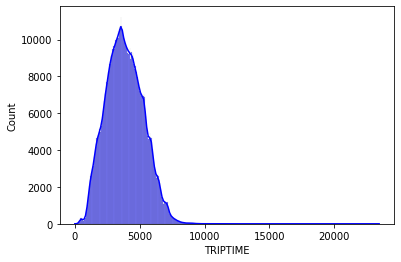

In [36]:
print('The skew of this distribution is = ', skew(df_dir_2['TRIPTIME']))
sns.histplot(df_dir_2['TRIPTIME'], kde = True, color = 'blue')
plt.show()

In [34]:
df_dir_2.to_csv('/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/data_exploration_dir_2_cleaned.csv', index=False)

Move to s4_feature_pairwise_interactions.ipynb